In [6]:
#Erick Sanchez


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily
import os
os.getcwd()

'C:\\Users\\masea\\Downloads'

In [2]:
# Part 1

url = "https://github.com/babdelfa/project/blob/main/covid19_project.csv?raw=true"
covid = pd.read_csv(url)
covid

,FIPS,county,state,lat,long_,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,11/7/2021,11/8/2021,11/9/2021,11/10/2021,11/11/2021,11/12/2021,11/13/2021,11/14/2021,11/15/2021,11/16/2021
0,1001.0,Autauga,Alabama,32.539527,-86.644082,0,0,0,0,0,...,10331,10335,10350,10355,10373,10383,10401,10403,10407,10419
1,1003.0,Baldwin,Alabama,30.727750,-87.722071,0,0,0,0,0,...,37648,37659,37737,37745,37785,37819,37855,37865,37875,37891
2,1005.0,Barbour,Alabama,31.868263,-85.387129,0,0,0,0,0,...,3614,3614,3620,3622,3631,3632,3648,3648,3648,3653
3,1007.0,Bibb,Alabama,32.996421,-87.125115,0,0,0,0,0,...,4295,4295,4301,4302,4310,4313,4317,4317,4317,4323
4,1009.0,Blount,Alabama,33.982109,-86.567906,0,0,0,0,0,...,10533,10534,10548,10547,10494,10513,10530,10534,10536,10548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,56039.0,Teton,Wyoming,43.935225,-110.589080,0,0,0,0,0,...,5243,5269,5281,5286,5286,5301,5301,5301,5309,5323
3338,56041.0,Uinta,Wyoming,41.287818,-110.547578,0,0,0,0,0,...,3901,3914,3925,3933,3933,3950,3950,3950,3965,3975
3339,90056.0,Unassigned,Wyoming,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,56043.0,Washakie,Wyoming,43.904516,-107.680187,0,0,0,0,0,...,1781,1786,1791,1803,1803,1815,1815,1815,1819,1820


In [3]:
drop = [ "FIPS","lat", "long_"]
covid.drop(columns=drop, inplace=True)
print(covid.columns[0:7])

Index(['county', 'state', '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020',
       '1/26/2020'],
      dtype='object')


In [4]:
keep = ["county", "state"]
covid_melted = pd.melt(covid, id_vars=keep, 
                          var_name='dates', 
                          value_name='cases')
covid_melted.tail()

,county,state,dates,cases
2222425,Teton,Wyoming,11/16/2021,5323
2222426,Uinta,Wyoming,11/16/2021,3975
2222427,Unassigned,Wyoming,11/16/2021,0
2222428,Washakie,Wyoming,11/16/2021,1820
2222429,Weston,Wyoming,11/16/2021,1183


In [5]:
covid_melted.dates = pd.to_datetime(covid_melted.dates)
covid_melted.dtypes

county            object
state             object
dates     datetime64[ns]
cases              int64
dtype: object

In [6]:
covid_graph = covid_melted.groupby(["dates"])["cases"].sum()
covid_graph.tail()

dates
2021-11-12    47007119
2021-11-13    47054618
2021-11-14    47079428
2021-11-15    47221527
2021-11-16    47309008
Name: cases, dtype: int64

In [7]:
#1 What is the total number of reported COVID-19 cases in the USA?
print("Total number of preported COVID-19 cases in the USA : ", "\n",covid_melted["cases"].sum())

Total number of preported COVID-19 cases in the USA :  
 12732974446


In [36]:
#2 What is the total number of reported COVID-19 cases for florida?
florida = covid_melted[covid_melted.state == "Florida"]
print("Total number of preported COVID-19 cases in Florida : ", "\n",florida["cases"].sum())

Total number of preported COVID-19 cases in Florida :  
 948231116


In [37]:
covid_florida = florida.groupby(["dates"])["cases"].sum()
covid_florida = covid_florida.to_frame()
covid_florida.reset_index(inplace=True)
covid_florida["new_cases"] = covid_florida.cases.diff()
covid_florida.tail()

,dates,cases,new_cases
660,2021-11-12,3711612,10302.0
661,2021-11-13,3711612,0.0
662,2021-11-14,3711612,0.0
663,2021-11-15,3711612,0.0
664,2021-11-16,3711612,0.0


(array([18885., 18892., 18901., 18908., 18915., 18922., 18932., 18939.,
        18946.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

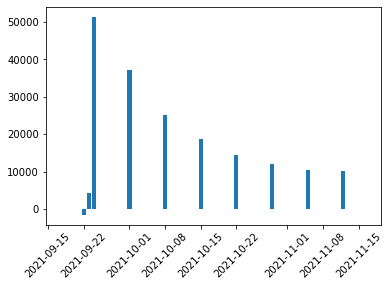

In [69]:
#3 Provide a bar chart displaying the new reported COVID-19cases in florida over the last 60 days.
plt.bar(covid_florida.dates.iloc[-60:], covid_florida.new_cases.iloc[-60:])
plt.xticks(rotation=45)

In [41]:
#4 Find the three florida counties with the highest reported COVID-19 cases in descending order.
covid_florida_counties = florida.groupby(["county"])["cases"].sum()
print("The three Florida counties with the highest reported COVID-19 cases are:", "\n",
      covid_florida_counties.sort_values(ascending = False)[:3])

The three Florida counties with the highest reported COVID-19 cases are: 
 county
Miami-Dade    198089799
Broward        97465558
Palm Beach     60123383
Name: cases, dtype: int64


In [42]:
#5 Find when each of the three florida counties (from problem 4) reported their highest number of new COVID-19 cases in a day.
#Miami-Dade
florida_MiamiDade = covid_melted[(covid_melted.state == "Florida") & (covid_melted.county == "Miami-Dade")]
florida_MiamiDade = florida_MiamiDade.groupby(["dates"])["cases"].sum()
florida_MiamiDade = florida_MiamiDade.to_frame()
florida_MiamiDade.reset_index(inplace=True)
florida_MiamiDade["new_cases"] = florida_MiamiDade.cases.diff()
florida_MiamiDade = florida_MiamiDade.groupby(["dates"])["new_cases"].max()
print("Date with the highest number of new COVID-19 cases in a day in Miami-Dade","\n",
      florida_MiamiDade.sort_values(ascending = False)[:1])

Date with the highest number of new COVID-19 cases in a day in Miami-Dade 
 dates
2021-08-13    21655.0
Name: new_cases, dtype: float64


In [46]:
#Broward
florida_Broward = covid_melted[(covid_melted.state == "Florida") & (covid_melted.county == "Broward")]
florida_Broward = florida_Broward.groupby(["dates"])["cases"].sum()
florida_Broward = florida_Broward.to_frame()
florida_Broward.reset_index(inplace=True)
florida_Broward["new_cases"] = florida_Broward.cases.diff()
florida_Broward = florida_Broward.groupby(["dates"])["new_cases"].max()
print("Date with the highest number of new COVID-19 cases in a day in Broward","\n",
      florida_Broward.sort_values(ascending = False)[:1])

Date with the highest number of new COVID-19 cases in a day in Broward 
 dates
2021-08-13    14666.0
Name: new_cases, dtype: float64


In [47]:
#Palm Beach
florida_PalmBeach = covid_melted[(covid_melted.state == "Florida") & (covid_melted.county == "Palm Beach")]
florida_PalmBeach = florida_PalmBeach.groupby(["dates"])["cases"].sum()
florida_PalmBeach = florida_PalmBeach.to_frame()
florida_PalmBeach.reset_index(inplace=True)
florida_PalmBeach["new_cases"] = florida_PalmBeach.cases.diff()
florida_PalmBeach = florida_PalmBeach.groupby(["dates"])["new_cases"].max()
print("Date with the highest number of new COVID-19 cases in a day in Palm Beach","\n",
      florida_PalmBeach.sort_values(ascending = False)[:1])

Date with the highest number of new COVID-19 cases in a day in Palm Beach 
 dates
2021-08-20    9294.0
Name: new_cases, dtype: float64


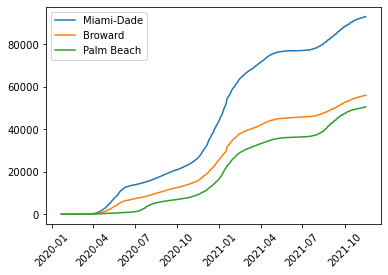

In [48]:
#6 Provide a figure with one subplot that shows three plotted lines - one for each county from problem 4. 
#Each line represents the county’s total reported COVID-19 cases over time.
max_cases_md = covid_melted[covid_melted.county == "Miami-Dade"].groupby("dates", as_index=False)["cases"].max()
max_cases_b = covid_melted[covid_melted.county == "Broward"].groupby("dates", as_index=False)["cases"].max()
max_cases_pv = covid_melted[covid_melted.county == "Palm Beach"].groupby("dates", as_index=False)["cases"].max()
plt.plot(max_cases_fx.dates, max_cases_fx.cases, label = "Miami-Dade")
plt.plot(max_cases_pw.dates, max_cases_pw.cases, label = "Broward")
plt.plot(max_cases_vb.dates, max_cases_vb.cases, label = "Palm Beach")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [51]:
#7 Find the total and average number of new COVID-19 cases reported in October 2021 for Miami-Dade.
MiamiDade = covid_melted[covid_melted.county == "Miami-Dade"]
october = florida[florida.county == "Miami-Dade"][(MiamiDade.dates >= "2021-10-1") & (MiamiDade.dates <= "2021-10-31")]
october["new_cases"] = october.cases.diff()
total = october.new_cases.sum()
length = len(october)
average = total/length
print("Total number of new COVID-19 cases reported in October 2021: ","\n", total)
print("Average number of new COVID-19 cases reported in October 2021: ","\n", average)

Total number of new COVID-19 cases reported in October 2021:  
 10349.0
Average number of new COVID-19 cases reported in October 2021:  
 333.83870967741933


In [17]:
# part 2 

import fsspec 
path = "https://github.com/babdelfa/gis/blob/main/counties_geometry.zip?raw=true"
with fsspec.open(path) as file:
    county = gpd.read_file(path)

In [18]:
import fsspec 
path2 = "https://github.com/babdelfa/gis/blob/main/state_geometry.zip?raw=true"
with fsspec.open(path2) as file:
    state = gpd.read_file(path2)

In [19]:
state.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [20]:
county.head()

,OBJECTID,FIPS_BEA,Shape_Leng,Shape_Area,geometry
0,1,1001.0,2.015303,0.150257,"POLYGON ((-86.41312 32.70739, -86.41304 32.687..."
1,2,1003.0,4.243962,0.409825,"POLYGON ((-87.76515 31.29735, -87.76360 31.297..."
2,3,1005.0,2.441082,0.223192,"POLYGON ((-85.35541 32.14717, -85.32444 32.147..."
3,4,1007.0,1.893893,0.156433,"POLYGON ((-87.06574 33.24691, -87.04483 33.246..."
4,5,1009.0,2.334544,0.164441,"POLYGON ((-86.48693 34.26021, -86.45288 34.259..."


In [21]:
url2 = "https://github.com/babdelfa/project/blob/main/covid19_project.csv?raw=true"
covid1 = pd.read_csv(url)
keep = ["FIPS","county", "state","lat", "long_"]
covid_melted1 = pd.melt(covid1, id_vars=keep, 
                          var_name='dates', 
                          value_name='cases')
covid_melted1.tail()


,FIPS,county,state,lat,long_,dates,cases
2222425,56039.0,Teton,Wyoming,43.935225,-110.589080,11/16/2021,5323
2222426,56041.0,Uinta,Wyoming,41.287818,-110.547578,11/16/2021,3975
2222427,90056.0,Unassigned,Wyoming,0.000000,0.000000,11/16/2021,0
2222428,56043.0,Washakie,Wyoming,43.904516,-107.680187,11/16/2021,1820
2222429,56045.0,Weston,Wyoming,43.839612,-104.567488,11/16/2021,1183


In [22]:
usa = gpd.GeoDataFrame(covid_melted1, 
                       crs="epsg:4326", 
                       geometry=gpd.points_from_xy(covid_melted1.long_, covid_melted1.lat))
usa.head()

,FIPS,county,state,lat,long_,dates,cases,geometry
0,1001.0,Autauga,Alabama,32.539527,-86.644082,1/22/2020,0,POINT (-86.64408 32.53953)
1,1003.0,Baldwin,Alabama,30.727750,-87.722071,1/22/2020,0,POINT (-87.72207 30.72775)
2,1005.0,Barbour,Alabama,31.868263,-85.387129,1/22/2020,0,POINT (-85.38713 31.86826)
3,1007.0,Bibb,Alabama,32.996421,-87.125115,1/22/2020,0,POINT (-87.12511 32.99642)
4,1009.0,Blount,Alabama,33.982109,-86.567906,1/22/2020,0,POINT (-86.56791 33.98211)


In [23]:
print(usa.columns)
print(state.columns)

Index(['FIPS', 'county', 'state', 'lat', 'long_', 'dates', 'cases',
       'geometry'],
      dtype='object')
Index(['STATE_NAME', 'DRAWSEQ', 'STATE_FIPS', 'SUB_REGION', 'STATE_ABBR',
       'geometry'],
      dtype='object')


In [24]:
usa.rename(columns={'FIPS': 'FIPS_BEA', 'state':"STATE_NAME"}, inplace=True)

In [25]:
usa.drop('geometry', axis=1,inplace=True)
usa.head()

,FIPS_BEA,county,STATE_NAME,lat,long_,dates,cases
0,1001.0,Autauga,Alabama,32.539527,-86.644082,1/22/2020,0
1,1003.0,Baldwin,Alabama,30.727750,-87.722071,1/22/2020,0
2,1005.0,Barbour,Alabama,31.868263,-85.387129,1/22/2020,0
3,1007.0,Bibb,Alabama,32.996421,-87.125115,1/22/2020,0
4,1009.0,Blount,Alabama,33.982109,-86.567906,1/22/2020,0


In [26]:
usa = usa.groupby(["FIPS_BEA","county"], as_index=False)['cases'].sum()
usa

,FIPS_BEA,county,cases
0,1001.0,Autauga,2765996
1,1003.0,Baldwin,9153967
2,1005.0,Barbour,992284
3,1007.0,Bibb,1096258
4,1009.0,Blount,2716804
...,...,...,...
3321,90051.0,Unassigned,5
3322,90053.0,Unassigned,584372
3323,90054.0,Unassigned,108
3324,90055.0,Unassigned,66


In [27]:
print(state.crs,county.crs,usa.crs)

epsg:4269 epsg:4269 epsg:4326


In [28]:
state = state.to_crs(epsg=4326)
county = county.to_crs(epsg=4326)
print(state.crs,county.crs,usa.crs)

epsg:4326 epsg:4326 epsg:4326


In [29]:
state.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07381 22.00417, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [30]:
usa.head()

,FIPS_BEA,county,cases
0,1001.0,Autauga,2765996
1,1003.0,Baldwin,9153967
2,1005.0,Barbour,992284
3,1007.0,Bibb,1096258
4,1009.0,Blount,2716804


In [31]:
county.head()


,OBJECTID,FIPS_BEA,Shape_Leng,Shape_Area,geometry
0,1,1001.0,2.015303,0.150257,"POLYGON ((-86.41312 32.70739, -86.41304 32.687..."
1,2,1003.0,4.243962,0.409825,"POLYGON ((-87.76515 31.29735, -87.76360 31.297..."
2,3,1005.0,2.441082,0.223192,"POLYGON ((-85.35541 32.14717, -85.32444 32.147..."
3,4,1007.0,1.893893,0.156433,"POLYGON ((-87.06574 33.24691, -87.04483 33.246..."
4,5,1009.0,2.334544,0.164441,"POLYGON ((-86.48693 34.26021, -86.45288 34.259..."


In [32]:
join = gpd.sjoin(county,state)
join.head()

,OBJECTID,FIPS_BEA,Shape_Leng,Shape_Area,geometry,index_right,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR
0,1,1001.0,2.015303,0.150257,"POLYGON ((-86.41312 32.70739, -86.41304 32.687...",42,Alabama,43,01,East South Central,AL
1,2,1003.0,4.243962,0.409825,"POLYGON ((-87.76515 31.29735, -87.76360 31.297...",42,Alabama,43,01,East South Central,AL
2,3,1005.0,2.441082,0.223192,"POLYGON ((-85.35541 32.14717, -85.32444 32.147...",42,Alabama,43,01,East South Central,AL
3,4,1007.0,1.893893,0.156433,"POLYGON ((-87.06574 33.24691, -87.04483 33.246...",42,Alabama,43,01,East South Central,AL
4,5,1009.0,2.334544,0.164441,"POLYGON ((-86.48693 34.26021, -86.45288 34.259...",42,Alabama,43,01,East South Central,AL


In [33]:
join_merged = pd.merge(usa,join, on= 'FIPS_BEA')
join_merged.head()


,FIPS_BEA,county,cases,OBJECTID,Shape_Leng,Shape_Area,geometry,index_right,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR
0,1001.0,Autauga,2765996,1,2.015303,0.150257,"POLYGON ((-86.41312 32.70739, -86.41304 32.687...",42,Alabama,43,01,East South Central,AL
1,1003.0,Baldwin,9153967,2,4.243962,0.409825,"POLYGON ((-87.76515 31.29735, -87.76360 31.297...",42,Alabama,43,01,East South Central,AL
2,1003.0,Baldwin,9153967,2,4.243962,0.409825,"POLYGON ((-87.76515 31.29735, -87.76360 31.297...",48,Florida,49,12,South Atlantic,FL
3,1005.0,Barbour,992284,3,2.441082,0.223192,"POLYGON ((-85.35541 32.14717, -85.32444 32.147...",42,Alabama,43,01,East South Central,AL
4,1005.0,Barbour,992284,3,2.441082,0.223192,"POLYGON ((-85.35541 32.14717, -85.32444 32.147...",44,Georgia,45,13,South Atlantic,GA


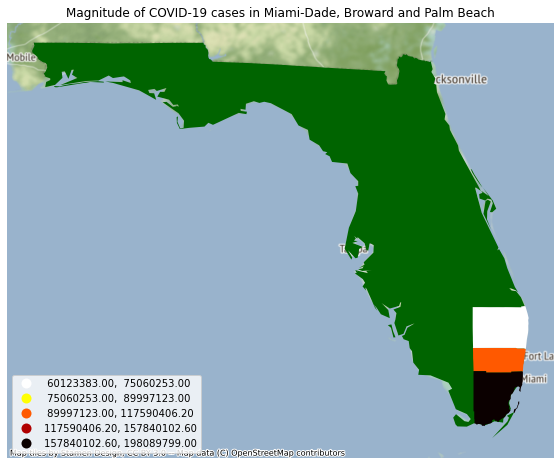

In [62]:
fig, ax = plt.subplots(figsize=(12,8))
state[(state.STATE_NAME == 'Florida')].plot(ax=ax, color='darkgreen')
join_merged[(join_merged.county =="Miami-Dade")|(join_merged.county == 'Broward')
              |(join_merged.county == 'Palm Beach')].plot(ax=ax,
         column='cases',
         scheme='quantiles',
         cmap='hot_r',legend=True,legend_kwds={'loc': 'lower left'},
         figsize=(12,8))
contextily.add_basemap(ax, crs=usa.crs.to_string())
plt.axis("off")
plt.title("Magnitude of COVID-19 cases in Miami-Dade, Broward and Palm Beach")
plt.show()

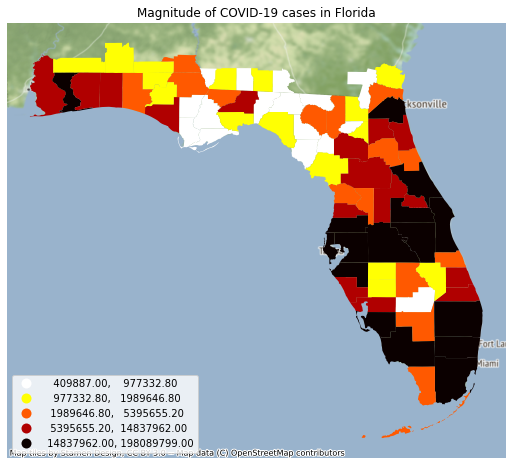

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
join_merged[(join_merged.STATE_NAME =="Florida")].plot(ax=ax,
         column='cases',
         scheme='quantiles',
         cmap='hot_r',legend=True,legend_kwds={'loc': 'lower left'},
         figsize=(12,8))
contextily.add_basemap(ax, crs=usa.crs.to_string())
plt.axis("off")
plt.title("Magnitude of COVID-19 cases in Florida")
plt.show()